Load the dataset

In [ ]:
import pandas as pd
import json

file_path = '/content/fashion_products_data.ldjson'

# Read the JSON lines file into a list of dictionaries
data = []
with open(file_path, 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Skipping line due to error: {e}")

df = pd.DataFrame(data)


print(f"DataFrame loaded with shape: {df.shape}")


DataFrame loaded with shape: (30000, 33)


Display the columns 'asin','product_url', 'product_name','sales_price','rating','meta_keywords','medium','brand'

In [ ]:
columns_to_display = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']
existing_columns = [col for col in columns_to_display if col in df.columns]

if existing_columns:
    print(f"\nDisplaying the first few rows of the selected columns:\n{df[existing_columns].head().to_string(index=False)}")
else:
    print("None of the specified columns are found in the dataset.")



Displaying the first few rows of the selected columns:
      asin                                                                                     product_url                                                                                 product_name sales_price rating                                                                                                                                           meta_keywords                                                                                                                                                                                                                                                                                                                                                                                                medium     brand
B07STS2W9T                  https://www.amazon.in/Facon-Kalamkari-Handblock-Dancers-Lehenga/dp/B07SWVSRPP/ LA' Facon Cotton Kalamkari Handblock Saree Blouse Fabric 100 cms B

Remove Special Character

In [ ]:
import pandas as pd
import re
import json

# Replace 'fashion_products_data.ldjson' with the exact filename displayed after upload
file_path = 'fashion_products_data.ldjson'  # Modify if the filename is different

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Remove special characters from 'product_name' and create a cleaned version
df['cleaned_product_name'] = df['product_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Filter to show only rows where the cleaned name differs from the original
filtered_df = df[df['product_name'] != df['cleaned_product_name']]

# Display the cleaned product names for the filtered rows
print(filtered_df['cleaned_product_name'].head().to_string(index=False))


LA Facon Cotton Kalamkari Handblock Saree Blous...
 Sf Jeans By Pantaloons Mens Plain Slim fit TShirt
LOVISTA Cotton Gota Patti Tassel Traditional Pr...
            People Mens Printed Regular fit TShirt
Forest Club  Gym Wear  Sports Shorts Shorts for...


Convert Short form to Long forms

In [ ]:
# Define a dictionary of common contractions and their expansions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are", "'s": " is",
    "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

# Function to expand contractions
def expand_contractions(text):
    for contraction, full_form in contractions_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text)
    return text

# Path to the uploaded file
file_path = '/content/fashion_products_data.ldjson'  # Modify path if different

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Remove special characters from 'product_name' and expand contractions
df['cleaned_product_name'] = df['product_name'].apply(lambda x: expand_contractions(re.sub(r'[^a-zA-Z0-9\s]', '', x)))

# Filter to show only rows where the cleaned name differs from the original
filtered_df = df[df['product_name'] != df['cleaned_product_name']]

# Display the cleaned product names for the filtered rows
print(filtered_df['cleaned_product_name'].head().to_string(index=False))

LA Facon Cotton Kalamkari Handblock Saree Blous...
 Sf Jeans By Pantaloons Mens Plain Slim fit TShirt
LOVISTA Cotton Gota Patti Tassel Traditional Pr...
            People Mens Printed Regular fit TShirt
Forest Club  Gym Wear  Sports Shorts Shorts for...


Import stopwords

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Remove special characters

In [ ]:
import pandas as pd
import re
import json
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Path to the uploaded file
file_path = '/content/fashion_products_data.ldjson'  # Modify path if different

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Remove special characters, expand contractions, and remove stopwords
def clean_product_name(text):
    # Expand contractions
    contractions_dict = {
        "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are", "'s": " is",
        "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
    }
    for contraction, full_form in contractions_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove stopwords
    return remove_stopwords(text)

# Apply the cleaning function
df['cleaned_product_name'] = df['product_name'].apply(clean_product_name)

# Filter to show only rows where the cleaned name differs from the original
filtered_df = df[df['product_name'] != df['cleaned_product_name']]

# Display the cleaned product names for the filtered rows
print(filtered_df['cleaned_product_name'].head().to_string(index=False))


LA Facon Cotton Kalamkari Handblock Saree Blous...
     Sf Jeans Pantaloons Men Plain Slim fit TShirt
LOVISTA Cotton Gota Patti Tassel Traditional Pr...
             People Men Printed Regular fit TShirt
Forest Club Gym Wear Sports Shorts Shorts Men S...


In [ ]:
import pandas as pd
import re
import json

# Load the dataset
file_path = '/content/fashion_products_data.ldjson'
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Function to clean text by removing numbers and special symbols
def clean_text(text):
    # Remove numbers and special symbols, keeping only alphabets and spaces
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply the function to the 'product_name' column
if 'product_name' in df.columns:
    df['cleaned_product_name'] = df['product_name'].fillna('').apply(clean_text)

# Display the cleaned product names
print("Sample of cleaned product names:")
print(df[['product_name', 'cleaned_product_name']].head())

# Save the cleaned DataFrame (optional)
df.to_csv('/content/cleaned_product_names.csv', index=False)
print("Cleaned product names saved to: /content/cleaned_product_names.csv")


Sample of cleaned product names:
                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...   
3           People Men's Printed Regular fit T-Shirt   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...   

                                cleaned_product_name  
0  LA Facon Cotton Kalamkari Handblock Saree Blou...  
1  Sf Jeans By Pantaloons Mens Plain Slim fit TShirt  
2  LOVISTA Cotton Gota Patti Tassel Traditional P...  
3             People Mens Printed Regular fit TShirt  
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...  
Cleaned product names saved to: /content/cleaned_product_names.csv


Remove stopwords

In [ ]:
from nltk.corpus import stopwords

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Path to the uploaded file
file_path = '/content/fashion_products_data.ldjson'  # Adjust the path if needed

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Remove special characters and stopwords from 'product_name'
df['cleaned_product_name'] = df['product_name'].apply(lambda x: remove_stopwords(re.sub(r'[^a-zA-Z0-9\s]', '', x)))

# Filter to show only rows where the cleaned name differs from the original
filtered_df = df[df['product_name'] != df['cleaned_product_name']]

# Display the cleaned product names for the filtered rows
print(filtered_df['cleaned_product_name'].head().to_string(index=False))


LA Facon Cotton Kalamkari Handblock Saree Blous...
    Sf Jeans Pantaloons Mens Plain Slim fit TShirt
LOVISTA Cotton Gota Patti Tassel Traditional Pr...
            People Mens Printed Regular fit TShirt
Forest Club Gym Wear Sports Shorts Shorts Men S...


Print all the product name

In [ ]:
# prompt: print all  'product_name' from dataset

print(df['product_name'].to_string(index=False))

LA' Facon Cotton Kalamkari Handblock Saree Blou...
Sf Jeans By Pantaloons Men's Plain Slim fit T-S...
LOVISTA Cotton Gota Patti Tassel Traditional Pr...
          People Men's Printed Regular fit T-Shirt
Monte Carlo Grey Solid Cotton Blend Polo Collar...
Forest Club | Gym Wear | Sports Shorts| Shorts ...
PrintOctopus Graphic Printed T-Shirt for Men Ch...
   Pepe Jeans Men's Solid Regular fit Casual Shirt
Carahere Boys Handmade Pre-Tied Classic Polka D...
                        Peppermint Synthetic Dress
Toddler Little Boy Straight Outta Timeout Long ...
            Puma Unisex Tribal Regular Fit T-Shirt
Jevi Prints Women's Cotton Printed Straight Kur...
OLLI Men's Orange, Lex Purple, White Cotton Bri...
Pinkmint Women's Multi-Coloured Digital Print C...
Miss Chase Women's Solid Shoulder Cut-Out Half-...
              bebe Women Genuine Leather Slim Belt
                   Colt by Unlimited Men's T-Shirt
                  Pepe Jeans Women's Solid T-Shirt
                 C9 Women Turqu

Required packages

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Remove non english words

In [ ]:
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Define English stopwords and the set of English words
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a dictionary of common contractions and their expansions
contractions_dict = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are", "'s": " is",
    "'d": " would", "'ll": " will", "'ve": " have", "'m": " am"
}

# Define mathematical terms to preserve
math_terms = {'cm', 'ml', 'mm', 'kg', 'g', 'inch', 'inches', 'meter', 'meters', 'liter', 'liters', 'oz', 'ft'}

# Function to expand contractions
def expand_contractions(text):
    for contraction, full_form in contractions_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text)
    return text

# Function to remove stopwords, stem, lemmatize, and filter out non-English words (while preserving numbers and math terms)
def process_text(text):
    # Expand contractions
    text = expand_contractions(text)

    # Remove special characters except numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Apply stemming and lemmatization
    stemmed = [stemmer.stem(word) for word in filtered_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]

    # Filter out non-English words but keep math terms, numbers, and words with digits
    english_only = [
        word for word in lemmatized
        if word.lower() in english_words or word.lower() in math_terms or re.search(r'\d', word)
    ]

    return ' '.join(english_only)

# Path to the uploaded file
file_path = '/content/fashion_products_data.ldjson'  # Modify path if needed

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Apply the text processing function
df['cleaned_product_name'] = df['product_name'].apply(process_text)

# Show a few samples to verify changes
print(df[['product_name', 'cleaned_product_name']].head(10))

# Save the cleaned DataFrame to a CSV file
output_path = '/content/cleaned_fashion_products_data.csv'
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...   
3           People Men's Printed Regular fit T-Shirt   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...   
5  Forest Club | Gym Wear | Sports Shorts| Shorts...   
6  PrintOctopus Graphic Printed T-Shirt for Men C...   
7    Pepe Jeans Men's Solid Regular fit Casual Shirt   
8  Carahere Boys Handmade Pre-Tied Classic Polka ...   
9                         Peppermint Synthetic Dress   

                                cleaned_product_name  
0  la cotton sare fabric 100 cm black base dancer...  
1                  jean pantaloon men plain slim fit  
2                           cotton tassel print suit  
3                              men print regular fit  
4                grey solid cotton blend polo collar  
5  forest club gym wear sport short short men smo... 

Download stopword packages

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Stemming and lemmitization

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')  # Additional WordNet data for lemmatization

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample text data (Replace with actual data as needed)
data = {
    'product_name': [
        "running shoes for men",
        "children's educational toys",
        "high-quality stainless steel kitchen set",
        "comfortable cotton hoodie",
        "12-pack eco-friendly toothbrushes"
    ]
}
df = pd.DataFrame(data)

# Function to perform both stemming and lemmatization
def stem_and_lemmatize(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    return ' '.join(lemmatized_words)

# Apply the function to the 'product_name' column
df['processed_product_name'] = df['product_name'].apply(stem_and_lemmatize)

# Show the results
print(df[['product_name', 'processed_product_name']])


                               product_name  \
0                     running shoes for men   
1               children's educational toys   
2  high-quality stainless steel kitchen set   
3                 comfortable cotton hoodie   
4         12-pack eco-friendly toothbrushes   

                  processed_product_name  
0                       run shoe for men  
1                     children' educ toy  
2  high-qual stainless steel kitchen set  
3                   comfort cotton hoodi  
4        12-pack eco-friendli toothbrush  


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import pandas as pd
import json

# Path to the uploaded file in Colab
file_path = '/content/fashion_products_data.ldjson'  # Adjust if the upload path is different

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Sort rows by the 'product_name' column
df_sorted = df.sort_values(by='product_name', ascending=True)

# Reset the index after sorting
df_sorted = df_sorted.reset_index(drop=True)

# Display the sorted DataFrame
print("Sorted DataFrame based on product_name:")
print(df_sorted[['product_name']].head(10))  # Displaying only the top 10 rows for brevity

# Save the sorted DataFrame to a new CSV file in Colab
output_path = '/content/sorted_fashion_products_data.csv'
df_sorted.to_csv(output_path, index=False)
print(f"Sorted data saved to {output_path}")


Sorted DataFrame based on product_name:
                                        product_name
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...
1  "Adventure" Belt; 1.25"(32mm) Nickel Free; Dai...
2  $15 Ties Men's Solid Necktie and Pocket Square...
3         '47 NCAA Men's Neps Henley Long Sleeve Tee
4            '47 NCAA Youth Basic MVP Adjustable Hat
5                    '47 NHL Men's Neps Football Tee
6  (Free Delivery) Women 2hook Bra Extender Combo...
7  001 Girls Shopping Sleeveless Denim Jacket for...
8  0Month+ Boys & Girls Ankle Length Lycra White ...
9  0Month+ Newborn Baby Cap Booty Mitten Set (Mul...
Sorted data saved to /content/sorted_fashion_products_data.csv


First 5 rows of the dataset:
                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-... 

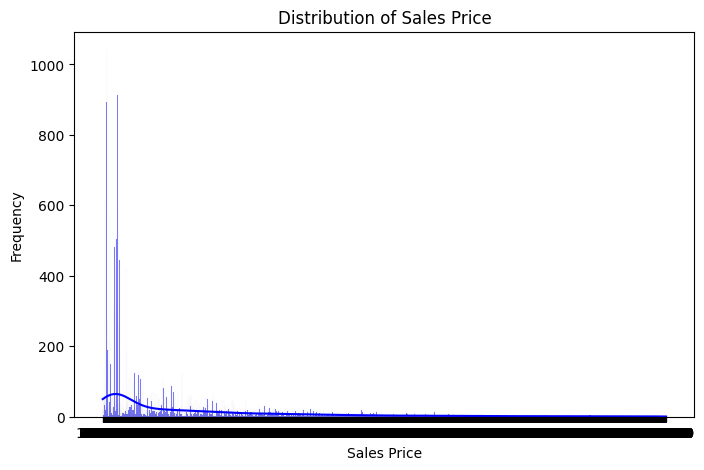

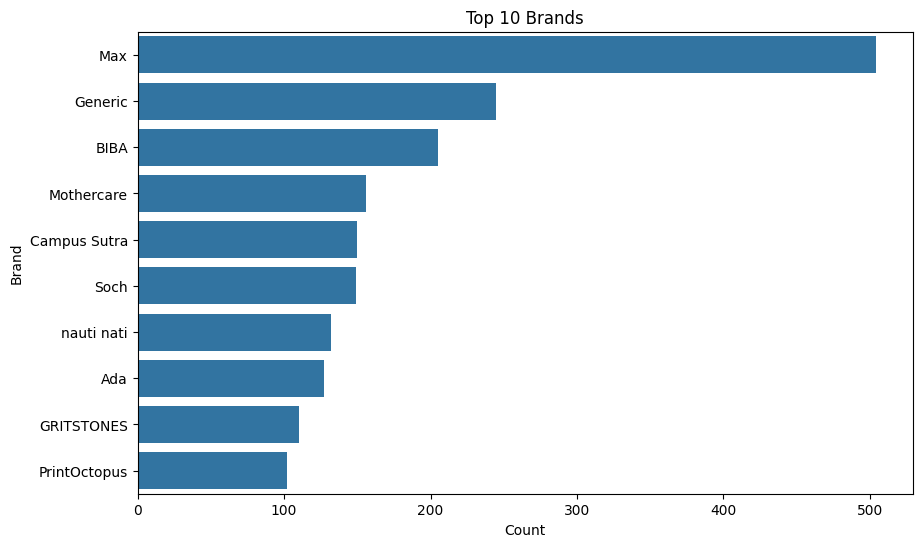

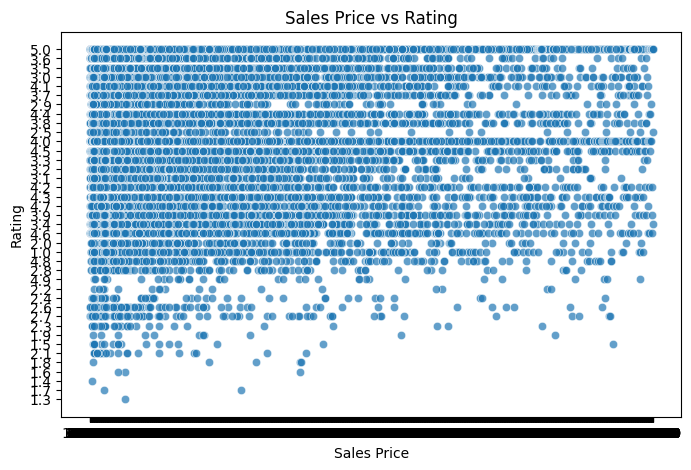

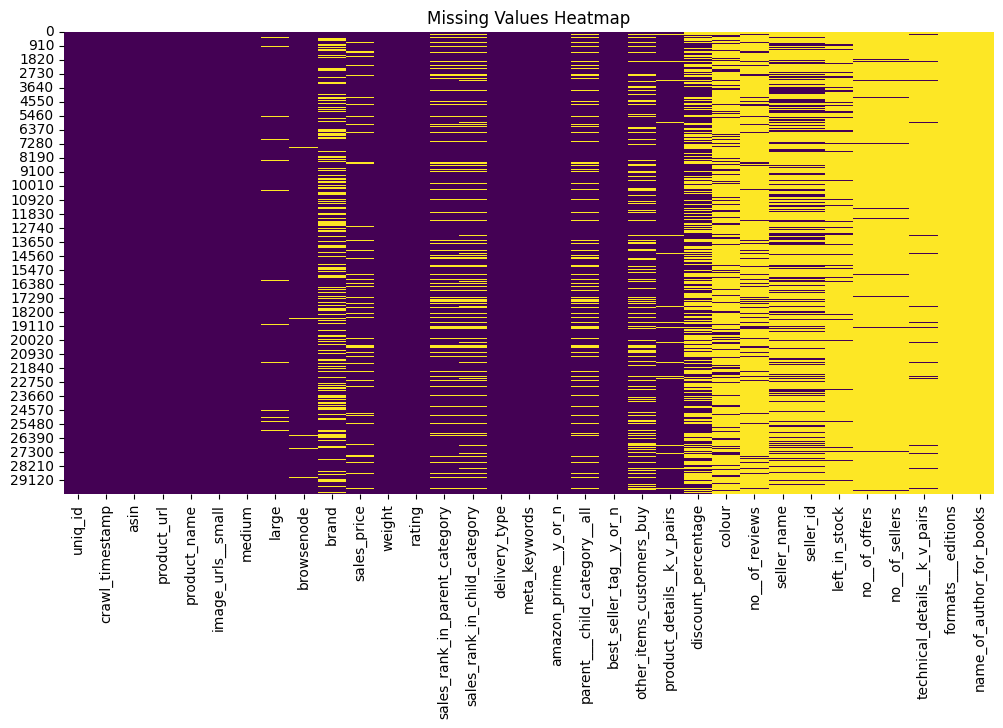

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Path to the uploaded file
file_path = '/content/fashion_products_data.ldjson'

# Read the LDJSON file and parse into a DataFrame
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset info:")
print(df.info())

# Visualization 1: Distribution of a numerical column (e.g., 'sales_price')
if 'sales_price' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['sales_price'], kde=True, bins=30, color='blue')
    plt.title('Distribution of Sales Price')
    plt.xlabel('Sales Price')
    plt.ylabel('Frequency')
    plt.show()

# Visualization 2: Count plot for a categorical column (e.g., 'brand')
if 'brand' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index[:10])
    plt.title('Top 10 Brands')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.show()

# Visualization 3: Scatter plot between two numerical columns (e.g., 'sales_price' and 'rating')
if 'sales_price' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='sales_price', y='rating', alpha=0.7)
    plt.title('Sales Price vs Rating')
    plt.xlabel('Sales Price')
    plt.ylabel('Rating')
    plt.show()

# Visualization 4: Missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Handle outliners

Original data shape: (27110, 33)
Cleaned data shape: (24546, 33)
Lower bound: -401.0, Upper bound: 1679.0
Sample of cleaned data:
                                        product_name  sales_price
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0
3           People Men's Printed Regular fit T-Shirt        195.0
5  Forest Club | Gym Wear | Sports Shorts| Shorts...        350.0


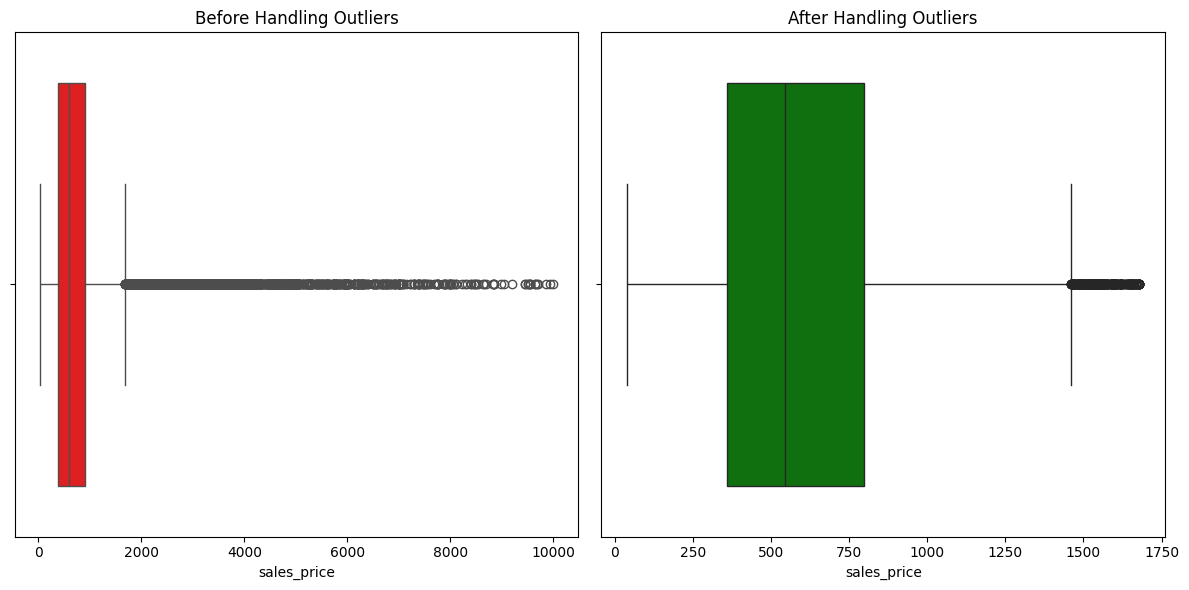

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load the dataset
file_path = '/content/fashion_products_data.ldjson'
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)

# Ensure the 'sales_price' column is numeric
if 'sales_price' in df.columns:
    df['sales_price'] = pd.to_numeric(df['sales_price'], errors='coerce')  # Convert non-numeric to NaN

# Drop rows with NaN in 'sales_price'
df = df.dropna(subset=['sales_price'])

# Function to detect and remove outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, lower_bound, upper_bound

# Handle outliers in 'sales_price'
if 'sales_price' in df.columns:
    df_cleaned, lower_bound, upper_bound = handle_outliers_iqr(df, 'sales_price')
    print(f"Original data shape: {df.shape}")
    print(f"Cleaned data shape: {df_cleaned.shape}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    # Display a sample of the cleaned data
    print("Sample of cleaned data:")
    print(df_cleaned[['product_name', 'sales_price']].head())

# Visualization: Before and After Outlier Handling
if 'sales_price' in df.columns:
    plt.figure(figsize=(12, 6))

    # Before handling outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='sales_price', color='red')
    plt.title('Before Handling Outliers')

    # After handling outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_cleaned, x='sales_price', color='green')
    plt.title('After Handling Outliers')

    plt.tight_layout()
    plt.show()


Bag of words (first 10 rows)

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the LDJSON file
file_path = '/content/fashion_products_data.ldjson'
data = pd.read_json(file_path, lines=True)

# Use 'product_name' as the text column for analysis
text_column = 'product_name'

# Check if the column exists
if text_column not in data.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset. Please check the column names.")

# Handle missing values
data[text_column] = data[text_column].fillna('')

# Use only the first 10 rows for processing
data = data.head(10)
texts = data[text_column]

# Create the Bag-of-Words model
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(texts)

# Compute cosine similarity between products
similarity_matrix = cosine_similarity(bow_matrix)

# Function to get recommendations
def recommend(product_index, top_n=5):
    similarities = similarity_matrix[product_index]
    similar_indices = similarities.argsort()[::-1][1:top_n+1]
    recommended_products = data.iloc[similar_indices]
    return recommended_products[['uniq_id', text_column]]

# Example: Recommend for the first product
product_index = 0
print(f"\nRecommendations for Product ID {data.iloc[product_index]['uniq_id']}:")
recommendations = recommend(product_index)
print(recommendations)



Recommendations for Product ID 26d41bdc1495de290bc8e6062d927729:
                            uniq_id  \
4  ad8a5a196d515ef09dfdaf082bdc37c4   
2  52e31bb31680b0ec73de0d781a23cc0a   
6  14d7d34c3cacd6c9ed1aa57f284e37ad   
5  73fd23f631d4434fd4a41ecc1b9f5eed   
9  87540e97ddd999f4986e56d964a6399b   

                                        product_name  
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...  
2  LOVISTA Cotton Gota Patti Tassel Traditional P...  
6  PrintOctopus Graphic Printed T-Shirt for Men C...  
5  Forest Club | Gym Wear | Sports Shorts| Shorts...  
9                         Peppermint Synthetic Dress  


recommendation system using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display
import pandas as pd

# Load your dataset
df = pd.read_json('fashion_products_data.ldjson', lines=True)  # Assuming dataset is in LDJSON format

# Filter the required columns
df_filtered = df[['product_name', 'image_urls__small']].dropna()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(df_filtered['product_name'])

# Recommendation Function for a Single Product

def recommend_similar_products_single(product_name, num_recommendations, dataframe, vectors):
    """
    Recommend similar products for a single product based on cosine similarity of TF-IDF vectors.

    Args:
        product_name (str): Name of the product to base recommendations on.
        num_recommendations (int): Number of recommendations to generate.
        dataframe (DataFrame): Product data containing names and images.
        vectors (csr_matrix): TF-IDF vectorized product names.
    """
    # Find the index of the product
    try:
        product_index = dataframe[dataframe['product_name'].str.contains(product_name, case=False)].index[0]
    except IndexError:
        print(f"Product '{product_name}' not found in the dataset.")
        return

    # Compute cosine similarity
    cosine_sim = cosine_similarity(vectors[product_index], vectors).flatten()

    # Get indices of the most similar products
    similar_indices = cosine_sim.argsort()[-(num_recommendations + 1):][::-1]  # Top recommendations, including itself

    # Exclude the queried product itself
    similar_indices = [i for i in similar_indices if i != product_index][:num_recommendations]

    # Display recommended products
    print(f"Recommendations for: {dataframe.iloc[product_index]['product_name']}")
    for idx in similar_indices:
        recommended_name = dataframe.iloc[idx]['product_name']
        print(f"- {recommended_name}")
        if 'image_urls__small' in dataframe.columns and pd.notnull(dataframe.iloc[idx]['image_urls__small']):
            display(Image(url=dataframe.iloc[idx]['image_urls__small'], width=150, height=150))

# Example Usage
recommend_similar_products_single('Shirt', 3, df_filtered, tfidf_vectors)


Recommendations for: Sf Jeans By Pantaloons Men's Plain Slim fit T-Shirt
- Sf Jeans By Pantaloons Men's Slim fit T-Shirt


- Sf Jeans By Pantaloons Men's Slim fit T-Shirt


- Sf Jeans By Pantaloons Men's Slim fit T-Shirt


word2vec

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# Load your dataset
df = pd.read_json('fashion_products_data.ldjson', lines=True)  # Assuming dataset is in LDJSON format

# Filter the required columns
df_filtered = df[['product_name', 'image_urls__small', 'brand']].dropna()

# Tokenize product names for Word2Vec
def tokenize(text):
    return text.lower().split()

df_filtered['tokenized_product_name'] = df_filtered['product_name'].apply(tokenize)

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=df_filtered['tokenized_product_name'], vector_size=100, window=5, min_count=1, workers=4)

# Function to compute average Word2Vec vector for a product name
def get_avg_word2vec_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Compute Word2Vec vectors for all product names
df_filtered['word2vec_vector'] = df_filtered['tokenized_product_name'].apply(lambda x: get_avg_word2vec_vector(x, word2vec_model))

# Recommendation Function using Word2Vec
def recommend_products_word2vec(product_index, num_recommendations, dataframe):
    """
    Recommend products based on cosine similarity of Word2Vec vectors.

    Args:
        product_index (int): Index of the product to base recommendations on.
        num_recommendations (int): Number of recommendations to generate.
        dataframe (DataFrame): Product data containing names, brands, and images.
    """
    # Get the vector of the queried product
    query_vector = dataframe.iloc[product_index]['word2vec_vector']

    # Compute cosine similarity with all other products
    all_vectors = np.stack(dataframe['word2vec_vector'].values)
    cosine_similarities = cosine_similarity([query_vector], all_vectors).flatten()

    # Get indices of the most similar products
    similar_indices = cosine_similarities.argsort()[-(num_recommendations + 1):][::-1]

    # Exclude the queried product itself
    similar_indices = [i for i in similar_indices if i != product_index][:num_recommendations]

    # Display recommended products
    print(f"Recommendations for: {dataframe.iloc[product_index]['product_name']} (Brand: {dataframe.iloc[product_index]['brand']})")
    for idx in similar_indices:
        product_name = dataframe.iloc[idx]['product_name']
        product_brand = dataframe.iloc[idx]['brand']
        print(f"- {product_name} (Brand: {product_brand})")
        if 'image_urls__small' in dataframe.columns and pd.notnull(dataframe.iloc[idx]['image_urls__small']):
            display(Image(url=dataframe.iloc[idx]['image_urls__small'], width=200, height=300))

# Example Usage
recommend_products_word2vec(0, 3, df_filtered)

Recommendations for: LA' Facon Cotton Kalamkari Handblock Saree Blouse Fabric 100 cms Black Base Dancers (Cotton) (Brand: LA' Facon)
- LA' Facon Cotton Kalamkari Handblock Saree Blouse Fabric 100 cms Black Base Dancers (Cotton) (Brand: LA' Facon)


- dB DESH BIDESH Women Sakuntala Design Pure Handloom Cotton Bengal Tant Saree Without Blouse Piece (Purple Off White) (Brand: dB DESH BIDESH)


- Pradeep Fashion Poly Cotton Stripe Style Saree With Blouse (Brand: Pradeep Fashion)


combination of word2vec and tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from IPython.display import Image, display
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bar

# Load your dataset
df = pd.read_json('fashion_products_data.ldjson', lines=True)  # Assuming dataset is in LDJSON format

# Filter the required columns
df_filtered = df[['product_name', 'image_urls__small', 'brand']].dropna()

# Train Word2Vec model
print("Training Word2Vec model...")
product_names = [name.split() for name in df_filtered['product_name']]
word2vec_model = Word2Vec(sentences=product_names, vector_size=50, window=5, min_count=1, workers=4)  # Reduced vector size
print("Word2Vec training completed.")

# TF-IDF Vectorizer
print("Generating TF-IDF vectors...")
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(df_filtered['product_name'])
feature_names = vectorizer.get_feature_names_out()
print("TF-IDF vectorization completed.")

# Compute Word2Vec weighted average vectors
def compute_weighted_word2vec(tfidf_vector, feature_names, word2vec_model):
    word2vec_vectors = []
    for idx, feature in enumerate(feature_names):
        if feature in word2vec_model.wv:
            word_vector = word2vec_model.wv[feature]
            tfidf_weight = tfidf_vector[0, idx]
            word2vec_vectors.append(word_vector * tfidf_weight)
    if word2vec_vectors:
        return np.mean(word2vec_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

print("Calculating Word2Vec TF-IDF weighted vectors...")
word2vec_tfidf_vectors = []
for i in tqdm(range(tfidf_vectors.shape[0]), desc="Processing Vectors"):
    word2vec_tfidf_vectors.append(
        compute_weighted_word2vec(tfidf_vectors[i], feature_names, word2vec_model)
)
word2vec_tfidf_vectors = np.array(word2vec_tfidf_vectors)
print("Word2Vec TF-IDF vectors calculation completed.")

# Recommendation Function
def recommend_products_combined(product_name, num_recommendations, dataframe, tfidf_vectors, word2vec_tfidf_vectors):
    """
    Recommend products based on a combination of TF-IDF and Word2Vec weighted similarity.

    Args:
        product_name (str): Name of the product to base recommendations on.
        num_recommendations (int): Number of recommendations to generate.
        dataframe (DataFrame): Product data containing names, brands, and images.
        tfidf_vectors (csr_matrix): TF-IDF vectorized product names.
        word2vec_tfidf_vectors (np.ndarray): Word2Vec weighted TF-IDF vectors.
    """
    # Find the index of the input product
    product_index = dataframe[dataframe['product_name'].str.contains(product_name, case=False)].index

    if product_index.empty:
        print(f"Product '{product_name}' not found in the dataset.")
        return

    product_index = product_index[0]

    # Compute cosine similarity using Word2Vec-TF-IDF vectors
    cosine_sim_word2vec = cosine_similarity(
        word2vec_tfidf_vectors[product_index].reshape(1, -1), word2vec_tfidf_vectors
    ).flatten()

    # Get indices of the most similar products
    similar_indices = cosine_sim_word2vec.argsort()[-(num_recommendations + 1):][::-1]

    # Exclude the queried product itself
    similar_indices = [i for i in similar_indices if i != product_index][:num_recommendations]

    # Display recommended products
    print(f"\nRecommendations for: {dataframe.iloc[product_index]['product_name']}")
    for idx in similar_indices:
        recommended_name = dataframe.iloc[idx]['product_name']
        recommended_brand = dataframe.iloc[idx]['brand']
        print(f"\nProduct: {recommended_name}")
        print(f"Brand: {recommended_brand}")
        if 'image_urls__small' in dataframe.columns and pd.notnull(dataframe.iloc[idx]['image_urls__small']):
            display(Image(url=dataframe.iloc[idx]['image_urls__small'], width=150, height=150))

# Example Usage
print("Starting recommendation generation...")
recommend_products_combined('Shirt', 3, df_filtered, tfidf_vectors, word2vec_tfidf_vectors)
print("Recommendation generation completed.")


Training Word2Vec model...
Word2Vec training completed.
Generating TF-IDF vectors...
TF-IDF vectorization completed.
Calculating Word2Vec TF-IDF weighted vectors...


Processing Vectors: 100%|██████████| 21857/21857 [28:23<00:00, 12.83it/s]


Word2Vec TF-IDF vectors calculation completed.
Starting recommendation generation...

Recommendations for: Toddler Little Boy Straight Outta Timeout Long Sleeve T-Shirt (2T, Black)

Product: Itrra Women's Floral Printed Sleevless Straight Long Full Length Black Jumpsuit
Brand: ITRRA



Product: PINKY PARI STYLISH DENIM PRINTED JACKET BLUE PRINTED STRAIGHT KURTI
Brand: PINKY PARI



Product: Enchanted Drapes Solid Straight Long Men's Kurta
Brand: Enchanted Drapes


Recommendation generation completed.


Incorporate the brand-based recommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display
import pandas as pd

# Load your dataset
df = pd.read_json('fashion_products_data.ldjson', lines=True)  # Assuming dataset is in LDJSON format

# Filter the required columns
df_filtered = df[['product_name', 'image_urls__small', 'brand']].dropna()

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(df_filtered['product_name'])

# Recommendation Function for a Single Brand
def recommend_products_by_brand(brand_name, dataframe):
    """
    Recommend products based on the brand name.

    Args:
        brand_name (str): Name of the brand to filter products.
        dataframe (DataFrame): Product data containing names, brands, and images.
    """
    # Filter the DataFrame for the specified brand
    brand_filtered = dataframe[dataframe['brand'].str.contains(brand_name, case=False)]

    if brand_filtered.empty:
        print(f"Brand '{brand_name}' not found in the dataset.")
        return

    # Display products of the specified brand
    print(f"Products from the brand: {brand_name}")
    for _, row in brand_filtered.iterrows():
        print(f"- Product: {row['product_name']}")
        if pd.notnull(row['image_urls__small']):
            display(Image(url=row['image_urls__small'], width=150, height=150))

# Example Usage
recommend_products_by_brand('Nike', df_filtered)


Products from the brand: Nike
- Product: Nike Brasilia 7 Gym Sack


- Product: Nike AC3787 Core Lock Training Gloves, Men's (Black/University Red)


- Product: Nike Ultimate Heavyweight Men's Gloves


- Product: Nike Men's Sleek Modern Plaque Belt, Lyons Blue, 38


- Product: Nike Men's Nike Men's New Tech Essentials Reversible Web Belt, volt/white, One Size


- Product: Nike Boy s Featherlight Printed Adjustable Hat
